In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.model_selection import  train_test_split
from sklearn.ensemble import RandomForestClassifier

from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

In [3]:
company=pd.read_csv("C:/Users/LENOVO/Desktop/ExcelR Assignmetns/Random Forest/Company_Data.csv")
company.head()

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
0,9.50,138,73,11,276,120,Bad,42,17,Yes,Yes
1,11.22,111,48,16,260,83,Good,65,10,Yes,Yes
2,10.06,113,35,10,269,80,Medium,59,12,Yes,Yes
3,7.40,117,100,4,466,97,Medium,55,14,Yes,Yes
4,4.15,141,64,3,340,128,Bad,38,13,Yes,No


In [4]:
company.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Sales        400 non-null    float64
 1   CompPrice    400 non-null    int64  
 2   Income       400 non-null    int64  
 3   Advertising  400 non-null    int64  
 4   Population   400 non-null    int64  
 5   Price        400 non-null    int64  
 6   ShelveLoc    400 non-null    object 
 7   Age          400 non-null    int64  
 8   Education    400 non-null    int64  
 9   Urban        400 non-null    object 
 10  US           400 non-null    object 
dtypes: float64(1), int64(7), object(3)
memory usage: 34.5+ KB


In [5]:
company.describe().T

,count,mean,std,min,25%,50%,75%,max
Sales,400.0,7.496325,2.824115,0.0,5.39,7.49,9.32,16.27
CompPrice,400.0,124.975000,15.334512,77.0,115.00,125.00,135.00,175.00
Income,400.0,68.657500,27.986037,21.0,42.75,69.00,91.00,120.00
Advertising,400.0,6.635000,6.650364,0.0,0.00,5.00,12.00,29.00
Population,400.0,264.840000,147.376436,10.0,139.00,272.00,398.50,509.00
Price,400.0,115.795000,23.676664,24.0,100.00,117.00,131.00,191.00
Age,400.0,53.322500,16.200297,25.0,39.75,54.50,66.00,80.00
Education,400.0,13.900000,2.620528,10.0,12.00,14.00,16.00,18.00


In [6]:
company.shape

(400, 11)

*********Sales************


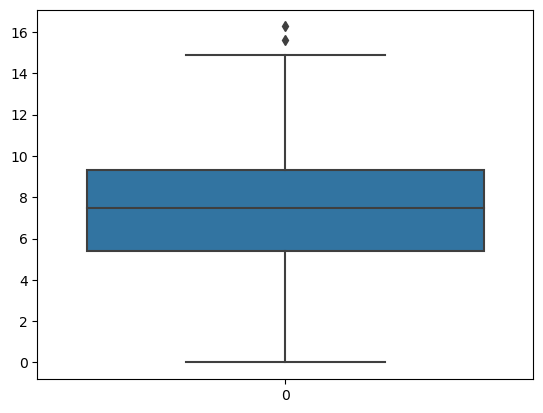

****************
*********CompPrice************


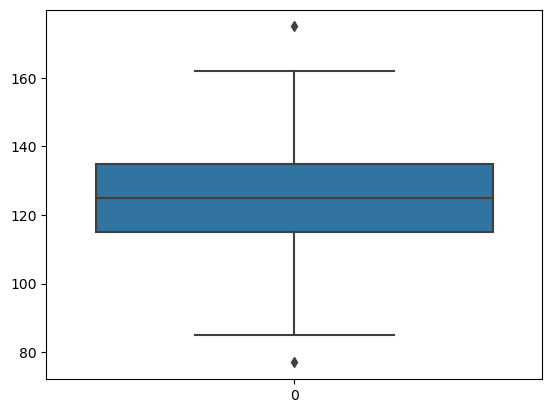

****************
*********Income************


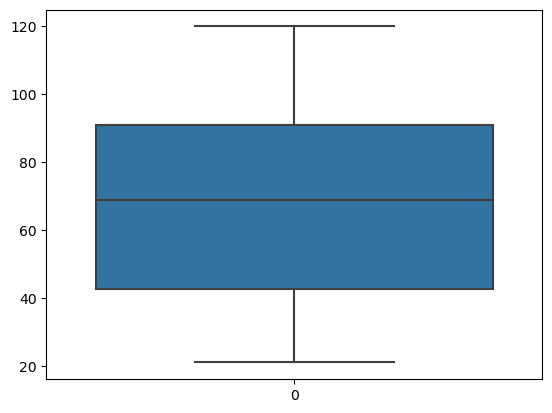

****************
*********Advertising************


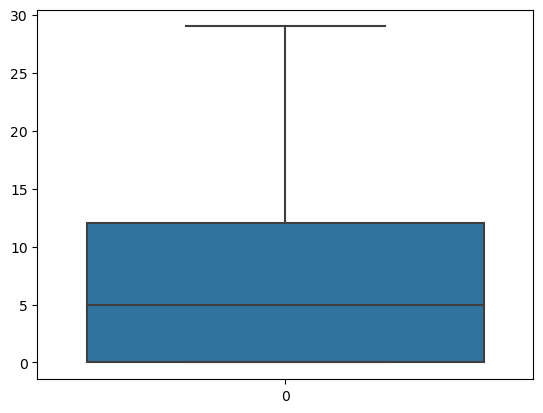

****************
*********Population************


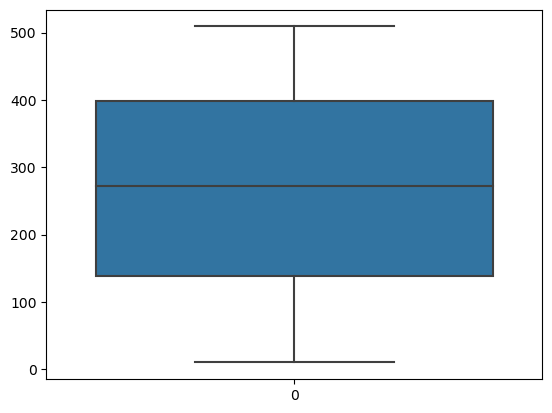

****************
*********Price************


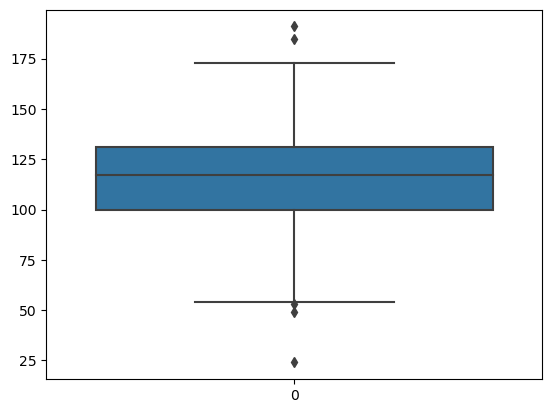

****************
*********Age************


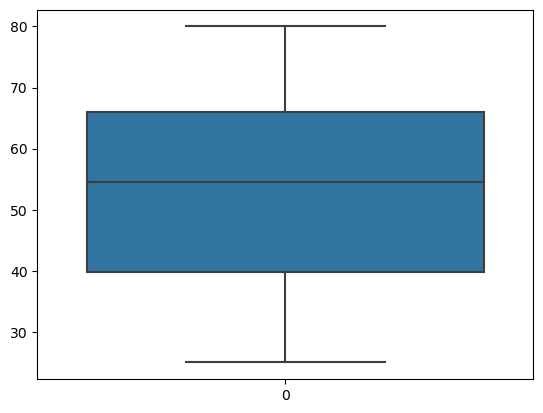

****************
*********Education************


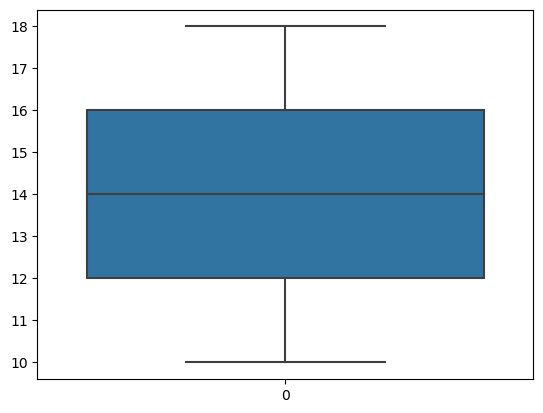

****************


In [7]:
for features in company.columns:
    if(company[features].dtype!='object'):
        print("*********{}************".format(features))
        sns.boxplot(company[features])
        plt.show()
        print("****************")

In [8]:
company[company.duplicated]

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US


In [9]:
for features in company.columns:
    if(company[features].dtype=='object'):
        company[features]=pd.Categorical(company[features])

In [10]:
company.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   Sales        400 non-null    float64 
 1   CompPrice    400 non-null    int64   
 2   Income       400 non-null    int64   
 3   Advertising  400 non-null    int64   
 4   Population   400 non-null    int64   
 5   Price        400 non-null    int64   
 6   ShelveLoc    400 non-null    category
 7   Age          400 non-null    int64   
 8   Education    400 non-null    int64   
 9   Urban        400 non-null    category
 10  US           400 non-null    category
dtypes: category(3), float64(1), int64(7)
memory usage: 26.7 KB


In [11]:
print("ShelveLoc")
print(company.ShelveLoc.value_counts())
print("******************************")
print("Urban")
print(company.Urban.value_counts())
print("******************************")
print("US")
print(company.US.value_counts())
print("******************************")

ShelveLoc
Medium    219
Bad        96
Good       85
Name: ShelveLoc, dtype: int64
******************************
Urban
Yes    282
No     118
Name: Urban, dtype: int64
******************************
US
Yes    258
No     142
Name: US, dtype: int64
******************************


In [12]:
# lets do label encoding for shelveloc and OHE for urban and us
temp_data=company
temp_data['ShelveLoc']=temp_data['ShelveLoc'].map({'Medium':1,'Bad':0,'Good':2})
temp_data['Urban']=np.where(temp_data.Urban=='Yes',1,0);
temp_data['US']=np.where(temp_data.US=='Yes',1,0);
temp_data.head()

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
0,9.50,138,73,11,276,120,0,42,17,1,1
1,11.22,111,48,16,260,83,2,65,10,1,1
2,10.06,113,35,10,269,80,1,59,12,1,1
3,7.40,117,100,4,466,97,1,55,14,1,1
4,4.15,141,64,3,340,128,0,38,13,1,0


In [13]:
# lets do test train split and model building
x=temp_data.drop('Sales',axis=1)
x.head()

,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
0,138,73,11,276,120,0,42,17,1,1
1,111,48,16,260,83,2,65,10,1,1
2,113,35,10,269,80,1,59,12,1,1
3,117,100,4,466,97,1,55,14,1,1
4,141,64,3,340,128,0,38,13,1,0


In [14]:
y=temp_data['Sales']
y=pd.cut(y.values,3,labels=['low','medium','high'])
y

['medium', 'high', 'medium', 'medium', 'low', ..., 'high', 'medium', 'medium', 'medium', 'medium']
Length: 400
Categories (3, object): ['low' < 'medium' < 'high']

In [15]:
x_train,x_test, y_train,y_test = train_test_split(x,y, test_size=0.2, random_state=42)

In [16]:
company.shape[1]

11

In [18]:
for depth in range(2,8):
  model=RandomForestClassifier(n_estimators=300,criterion='entropy',max_depth=depth,bootstrap=True,max_features=5)
  model.fit(x_train,y_train)
  print("*****depth {}***********".format(depth))
  print(model.score(x_train,y_train)*100)
  print(model.score(x_test,y_test)*100)

*****depth 2***********
65.0
61.25000000000001
*****depth 3***********
75.9375
70.0
*****depth 4***********
79.6875
70.0
*****depth 5***********
85.625
75.0
*****depth 6***********
94.0625
73.75
*****depth 7***********
98.125
76.25


In [19]:
for depth in range(2,8):
  model=RandomForestClassifier(n_estimators=300,criterion='gini',max_depth=depth,bootstrap=True,max_features=5)
  model.fit(x_train,y_train)
  print("*****depth {}***********".format(depth))
  print(model.score(x_train,y_train)*100)
  print(model.score(x_test,y_test)*100)

*****depth 2***********
71.875
63.74999999999999
*****depth 3***********
77.1875
66.25
*****depth 4***********
80.3125
66.25
*****depth 5***********
84.375
71.25
*****depth 6***********
89.375
73.75
*****depth 7***********
94.375
71.25


In [20]:
model=RandomForestClassifier(n_estimators=300,criterion='gini',max_depth=3,bootstrap=True,max_features=4)
model.fit(x_train,y_train)
print(model.score(x_train,y_train)*100)
print(model.score(x_test,y_test)*100)

75.0
66.25


In [22]:
model=RandomForestClassifier(n_estimators=300,criterion='entropy',max_depth=3,bootstrap=True,max_features=4)
model.fit(x_train,y_train)
print(model.score(x_train,y_train)*100)
print(model.score(x_test,y_test)*100)

74.6875
66.25


In [24]:
num_tree=300
list=[]
for i in range(1,6):
    max_feature=11
    kfold=KFold(n_splits=10,random_state=7,shuffle=True)
    model=RandomForestClassifier(n_estimators=num_tree,max_depth=3,max_features=i)
    result=cross_val_score(model,x,y,cv=kfold)
    list.append(result.mean()*100)

In [25]:
(sum(list)/len(list))

65.75